In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
data = pd.read_csv('Tamil_Nadu_State_Elections_2021_Details.csv')

In [16]:
data

,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Tot_Constituency_votes_polled,Tot_votes_by_parties,Winning_votes,Win_Lost_Flag
0,Alandur,T.M.Anbarasan,Dravida Munnetra Kazhagam,115777,1008,116785,49.12,237751,17430100,116785,True
1,Alandur,B.Valarmathi,All India Anna Dravida Munnetra Kazhagam,75634,580,76214,32.06,237751,15390974,116785,False
2,Alandur,N.Raja,Desiya Makkal Sakthi Katchi,261,4,265,0.11,237751,4125,116785,False
3,Alandur,G Kamalakannan,Tamil Nadu Ilangyar Katchi,1096,9,1105,0.46,237751,22953,116785,False
4,Alandur,Dr.R.Karthikeyan,Naam Tamilar Katchi,16453,53,16506,6.94,237751,3041974,116785,False
...,...,...,...,...,...,...,...,...,...,...,...
4227,Vilavancode,IDEN SONI L,Desiya Murpokku Dravida Kazhagam,2415,32,2447,1.46,167836,200156,87473,False
4228,Vilavancode,VIJAYADHARANI S,Indian National Congress,86227,1246,87473,52.12,167836,1976527,87473,True
4229,Vilavancode,JAYASEELAN R,Bharatiya Janata Party,58156,648,58804,35.04,167836,1213510,87473,False
4230,Vilavancode,WILSON G,Shiv Sena,161,0,161,0.10,167836,1205,87473,False


In [17]:
data.head()


,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,%_of_Votes,Tot_Constituency_votes_polled,Tot_votes_by_parties,Winning_votes,Win_Lost_Flag
0,Alandur,T.M.Anbarasan,Dravida Munnetra Kazhagam,115777,1008,116785,49.12,237751,17430100,116785,True
1,Alandur,B.Valarmathi,All India Anna Dravida Munnetra Kazhagam,75634,580,76214,32.06,237751,15390974,116785,False
2,Alandur,N.Raja,Desiya Makkal Sakthi Katchi,261,4,265,0.11,237751,4125,116785,False
3,Alandur,G Kamalakannan,Tamil Nadu Ilangyar Katchi,1096,9,1105,0.46,237751,22953,116785,False
4,Alandur,Dr.R.Karthikeyan,Naam Tamilar Katchi,16453,53,16506,6.94,237751,3041974,116785,False


In [22]:
features = ['EVM_Votes', 'Postal_Votes', 'Total_Votes', '%_of_Votes', 'Tot_Constituency_votes_polled', 'Tot_votes_by_parties']


In [23]:
X = data[features]


In [24]:
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Explicitly set n_init to suppress the warning
clusters = kmeans.fit_predict(X)

In [25]:
cluster_predictions = {}
for cluster_id in range(n_clusters):
    cluster_data = data[clusters == cluster_id]
    party_votes = cluster_data.groupby('Party')['Total_Votes'].sum()
    predicted_winner = party_votes.idxmax()
    cluster_predictions[cluster_id] = predicted_winner

In [32]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


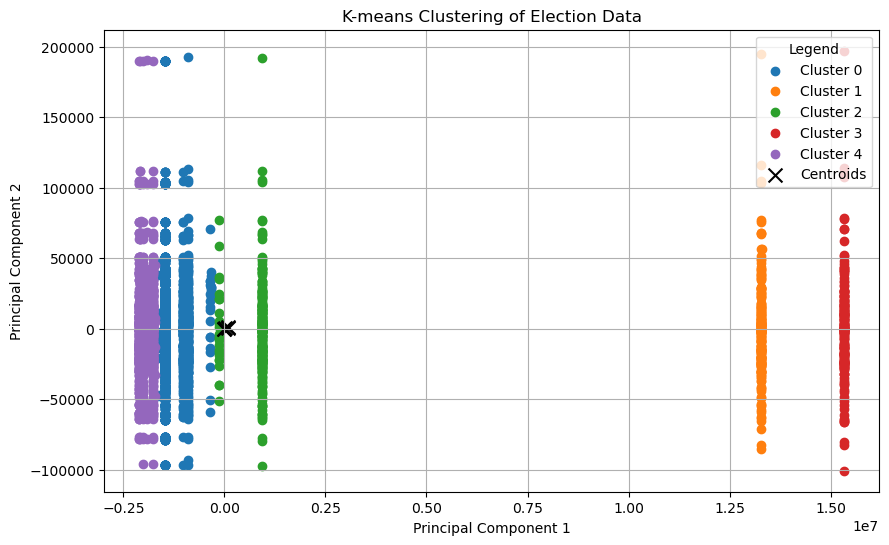

In [53]:
plt.figure(figsize=(10, 6))
scatter_handles = []
for cluster_id in range(n_clusters):
    scatter = plt.scatter(X_pca[clusters == cluster_id, 0], X_pca[clusters == cluster_id, 1], label=f'Cluster {cluster_id}')
    scatter_handles.append(scatter)
    centroids = kmeans.cluster_centers_
centroids_handle = plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')
plt.legend(title='Legend', loc='upper right')

plt.title('K-means Clustering of Election Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [54]:
overall_winner = max(cluster_predictions.values(), key=lambda x: list(cluster_predictions.values()).count(x))

print("Overall Predicted Winning Party for the 2024 Election:", overall_winner)

Overall Predicted Winning Party for the 2024 Election: Pattali Makkal Katchi
